In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime

In [4]:
df = pd.read_csv('listings.csv')
df.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

Some of columns are not useful in EDA, we can drop them and focus only features we really interested in.

In [5]:
drop_columns=['id', 'listing_url', 'scrape_id','medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name','name','host_thumbnail_url','host_picture_url','thumbnail_url']

Let's calculate the percentage of missing values in each column and drop the columns with high percentages.

In [6]:
missing_value_percent = df.isnull().mean()

In [7]:
missing_value_percent[missing_value_percent>0.4].sort_values()

notes               0.420639
weekly_price        0.473808
security_deposit    0.511262
monthly_price       0.602672
square_feet         0.974594
license             1.000000
dtype: float64

It's seen that all values are missing in 'licence' column, and 97.5% of 'square_feet' column is missing. Those two columns can be dropped.

A deeper look is needed in the columns that has 60% missing values or less before dropping them.

In [8]:
[drop_columns.append(i) for i in ['license','square_feet']]

[None, None]

Some of columns with desriptive content like 'summary', 'space', 'description', and the missing values of them are quite low, so it cannot help in creating new feature, so they can be dropped.

In [9]:
[drop_columns.append(i) for i in ['summary','space','description','neighborhood_overview','notes','transit','host_about']]

[None, None, None, None, None, None, None]

Some of columns has only one value or most of values belog to one category so we can drop them as they will not tell any correlation with other features.

In [10]:
[drop_columns.append(i) for i in ['experiences_offered','host_location','host_has_profile_pic','city','state','market','smart_location','country_code'
                    , 'country','requires_license','jurisdiction_names','has_availability','host_acceptance_rate']] 

[None, None, None, None, None, None, None, None, None, None, None, None, None]

Some columns have the same information like 'last_scraped' and 'calendar_last_scraped', so they can be dropped.

In [11]:
(df['last_scraped'] == df['calendar_last_scraped']).mean()

1.0

The same information in 'street' column can be extracted from 'zipcode' or 'neighbourhood' column. so we can drop them.   

In [12]:
[drop_columns.append(i) for i in ['street','zipcode','calculated_host_listings_count']] 

[None, None, None]

In [13]:
drop_columns

['id',
 'listing_url',
 'scrape_id',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'name',
 'host_thumbnail_url',
 'host_picture_url',
 'thumbnail_url',
 'license',
 'square_feet',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'notes',
 'transit',
 'host_about',
 'experiences_offered',
 'host_location',
 'host_has_profile_pic',
 'city',
 'state',
 'market',
 'smart_location',
 'country_code',
 'country',
 'requires_license',
 'jurisdiction_names',
 'has_availability',
 'host_acceptance_rate',
 'street',
 'zipcode',
 'calculated_host_listings_count']

In [14]:
len(drop_columns)

38

In [15]:
df.drop(columns=drop_columns,index=1,inplace=True)
df.head()

last_scraped  host_since  host_response_time host_response_rate  \
0   2016-01-04  2011-08-11  within a few hours                96%   
2   2016-01-04  2014-06-12  within a few hours                67%   
3   2016-01-04  2013-11-06                 NaN                NaN   
4   2016-01-04  2011-11-29      within an hour               100%   
5   2016-01-04  2010-12-25                 NaN                NaN   

  host_is_superhost host_neighbourhood  host_listings_count  \
0                 f         Queen Anne                  3.0   
2                 f         Queen Anne                  2.0   
3                 f         Queen Anne                  1.0   
4                 f         Queen Anne                  2.0   
5                 f         Queen Anne                  1.0   

   host_total_listings_count  \
0                        3.0   
2                        2.0   
3                        1.0   
4                        2.0   
5                        1.0   

                                  host_verifications host_identity_verified  \
0               ['email', 'phone', 'reviews', 'kba']                      t   
2   ['email', 'phone', 'google', 'reviews', 'jumio']                      t   
3  ['email', 'phone', 'facebook', 'reviews', 'jum...                      t   
4   ['email', 'phone', 'facebook', 'reviews', 'kba']                      t   
5   ['email', 'phone', 'facebook', 'reviews', 'kba']                      t   

   ... review_scores_cleanliness review_scores_checkin  \
0  ...                      10.0                  10.0   
2  ...                      10.0                  10.0   
3  ...                       NaN                   NaN   
4  ...                       9.0                  10.0   
5  ...                      10.0                  10.0   

  review_scores_communication  review_scores_location  review_scores_value  \
0                        10.0                     9.0                 10.0   
2                        10.0                    10.0                 10.0   
3                         NaN                     NaN                  NaN   
4                        10.0                     9.0                  9.0   
5                        10.0                    10.0                 10.0   

  instant_bookable cancellation_policy require_guest_profile_picture  \
0                f            moderate                             f   
2                f              strict                             f   
3                f            flexible                             f   
4                f              strict                             f   
5                f              strict                             f   

   require_guest_phone_verification  reviews_per_month  
0                                 f               4.07  
2                                 f               1.15  
3                                 f                NaN  
4                                 f               0.89  
5                                 f               2.45  

[5 rows x 54 columns]

## Handling Date Columns

For features with date time, we need to handle them in a way that can be useful.

In [17]:
date_cols = ['last_scraped','first_review','last_review','host_since']

In [18]:
last_scraped_date = pd.to_datetime(df['last_scraped'])
today_date = pd.to_datetime(datetime.datetime.now())

The missing values in 'host_since' column can be imputed with the mode value. The days since the host listed their property will be till the last scraped date.

In [19]:
df['host_since'] = df['host_since'].fillna(df['host_since'].mode()[0])
df['host_since_days'] = last_scraped_date - pd.to_datetime(df['host_since'])

In [20]:
df['host_since_days'] = df['host_since_days'].apply(lambda x: x.value/10**9/3600/24)

In [21]:
(df['host_since']).isnull().mean()

0.0

In [22]:
df['first_review'] = df['first_review'].fillna(today_date)
df['time_to_first_review'] = last_scraped_date - pd.to_datetime(df['first_review'])

In [23]:
df['time_to_first_review'] = df['time_to_first_review'].apply(lambda x: x.value/10**9/3600/24)

In [24]:
(df['host_since_days'] - df['time_to_first_review']).value_counts().sort_values(ascending=False)

9.000000       29
13.000000      28
7.000000       24
19.000000      24
8.000000       23
               ..
485.000000      1
3043.868116     1
1343.000000     1
1693.000000     1
250.000000      1
Length: 1656, dtype: int64

In [25]:
df['last_review'] = df['last_review'].fillna(last_scraped_date)
df['time_from_last_review'] = last_scraped_date - pd.to_datetime(df['last_review'])

In [26]:
df['time_from_last_review'] = df['time_from_last_review'].apply(lambda x: x.value/10**9/3600/24)

<AxesSubplot:>

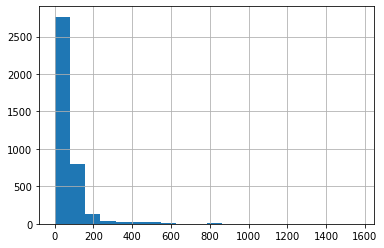

In [27]:
df['time_from_last_review'].hist(bins=20)

<AxesSubplot:>

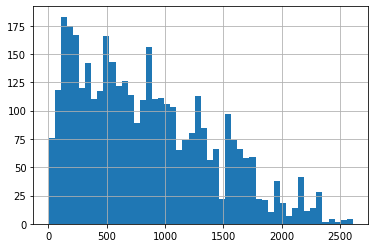

In [30]:
df['host_since_days'].hist(bins=50)

We see that the distribution of 'host_since' in days has no normal distribution pattern and the majority are new to Airbnb.

## Handeling Numerical Features

In [31]:
num_cols=['price','weekly_price','monthly_price','cleaning_fee']

for col in num_cols:
    df[col] = df[col].fillna('$0')
    df[f"{col}_number"] = df[col].apply(lambda x: x.replace('$',''))
    df[f"{col}_number"] = df[f"{col}_number"].apply(lambda x: x.replace(',',''))
    df[f"{col}_number"] = df[f"{col}_number"].astype(float)

In [32]:
df.drop(columns=num_cols,axis=1,inplace=True)

In [33]:
review_cols=['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location',
       'review_scores_value','reviews_per_month']

In [34]:
df[review_cols].isnull().sum()

review_scores_rating           647
review_scores_accuracy         658
review_scores_cleanliness      653
review_scores_checkin          658
review_scores_communication    651
review_scores_location         655
review_scores_value            656
reviews_per_month              627
dtype: int64

In [35]:
for col in review_cols:
    df[col] = df[col].fillna(df[col].mean())

In [36]:
df[review_cols].isnull().sum()

review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

## Handeling Categorical Features

In [40]:
cat_cols=['host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_verifications', 'host_identity_verified', 'neighbourhood',
        'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'security_deposit', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365',  'number_of_reviews',
        'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month']

In [41]:
cat_df=df[cat_cols]
cols_missing_values=[]
for col in cat_cols:
    if df[col].isnull().mean()>0:
        cols_missing_values.append(col)

In [42]:
cols_missing_values

['host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_identity_verified',
 'neighbourhood',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit']

In [43]:
df[cols_missing_values].isnull().sum().sort_values()

property_type                1
beds                         1
host_is_superhost            2
host_identity_verified       2
bedrooms                     6
bathrooms                   16
host_neighbourhood         300
neighbourhood              416
host_response_time         523
host_response_rate         523
security_deposit          1952
dtype: int64

For features with very low number of missing values, we can impute the missing value with the mode as it will not have significante effect.
For nieghbourhood and host_neighbourhood, we can drop the records with missing values as it is difficult to be imputed and they seem to have effect on the price.
For security deposit, A new feature can be created 'has_security_deposit'

In [44]:
for col in ['property_type','beds','host_is_superhost','host_identity_verified','bedrooms','bathrooms','host_response_time','host_response_rate']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [45]:
df[['property_type','beds','host_is_superhost','host_identity_verified','bedrooms','bathrooms','host_response_time','host_response_rate']].isnull().mean()

property_type             0.0
beds                      0.0
host_is_superhost         0.0
host_identity_verified    0.0
bedrooms                  0.0
bathrooms                 0.0
host_response_time        0.0
host_response_rate        0.0
dtype: float64

In [46]:
df.dropna(subset=['host_neighbourhood','neighbourhood'],axis=0,inplace=True)

In [47]:
df.isnull().mean()

last_scraped                        0.000000
host_since                          0.000000
host_response_time                  0.000000
host_response_rate                  0.000000
host_is_superhost                   0.000000
host_neighbourhood                  0.000000
host_listings_count                 0.000000
host_total_listings_count           0.000000
host_verifications                  0.000000
host_identity_verified              0.000000
neighbourhood                       0.000000
neighbourhood_cleansed              0.000000
neighbourhood_group_cleansed        0.000000
latitude                            0.000000
longitude                           0.000000
is_location_exact                   0.000000
property_type                       0.000000
room_type                           0.000000
accommodates                        0.000000
bathrooms                           0.000000
bedrooms                            0.000000
beds                                0.000000
bed_type  

In [48]:
df['same_neighbourhood'] = np.where(df['host_neighbourhood'] == df['neighbourhood'],1,0)

In [49]:
df['has_security_deposit'] = np.where(df['security_deposit'].isnull(),0,1)
df.drop(columns='security_deposit',inplace=True)

In [51]:
import seaborn as sns

We can get a quick view for the correlation between th features in our data set.

<AxesSubplot:>

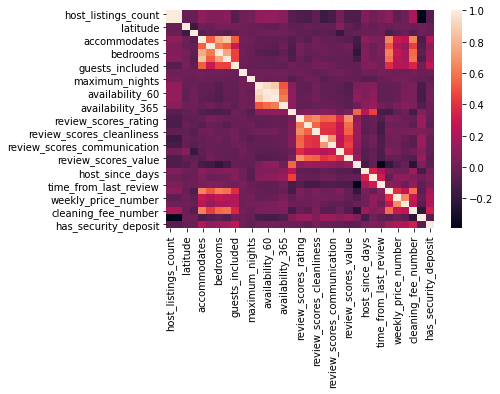

In [52]:
sns.heatmap(df.corr(),linewidths=0)

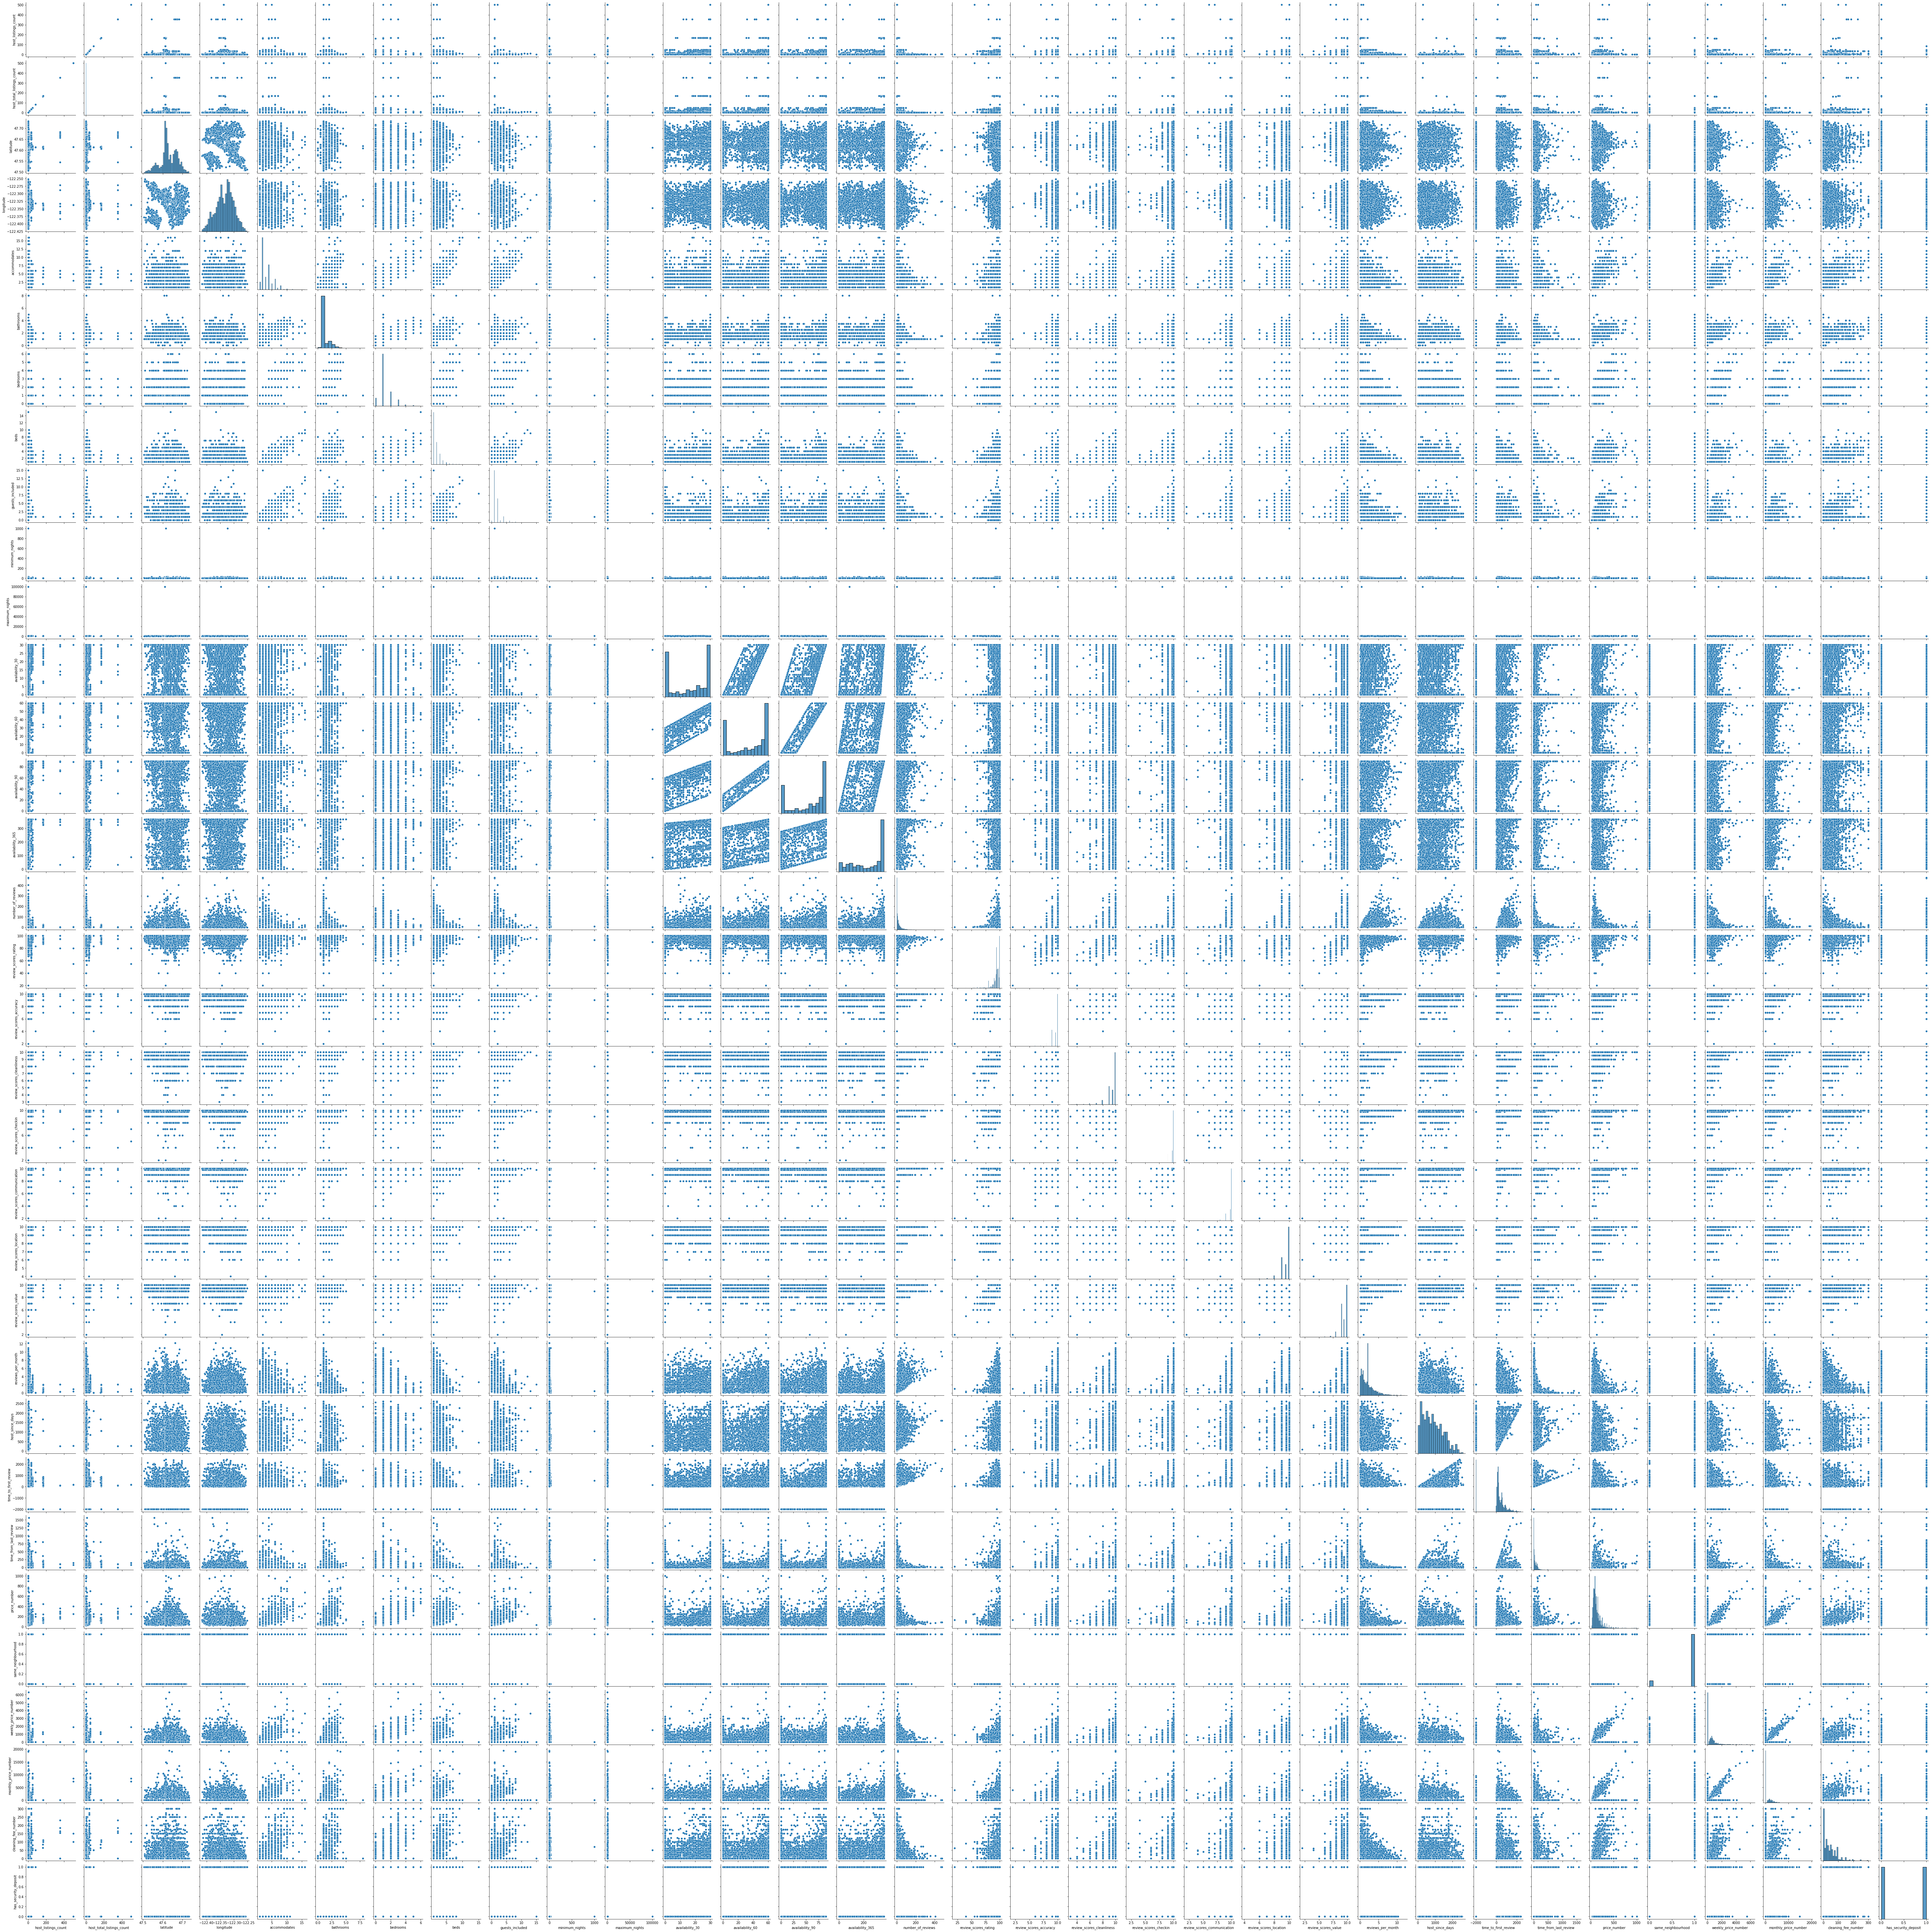

In [220]:
sns.pairplot(df)

In [225]:
df['host_listings_count']

0         3.0
2         2.0
3         1.0
4         2.0
5         1.0
        ...  
3811      1.0
3812      3.0
3813    354.0
3814      1.0
3817      1.0
Name: host_listings_count, Length: 3399, dtype: float64

In [232]:
(df['host_total_listings_count'] == df['host_listings_count']).mean()

1.0

## How to gain more income from listing your property in Seattle?

We need to study the effect of factors related to the property that affect the price on Airbnb.

The first feature that infleunce the price is the neighbourhood. We see from the graph below that Fairmount Park has the highest average price among other neighbourhoods.
From the value counts of 'neighbourhood', we see that there is only one property in Fairmount Park. Further investigations needed to study the effect of neighbourhood in the areas where higher number of properties are located. 

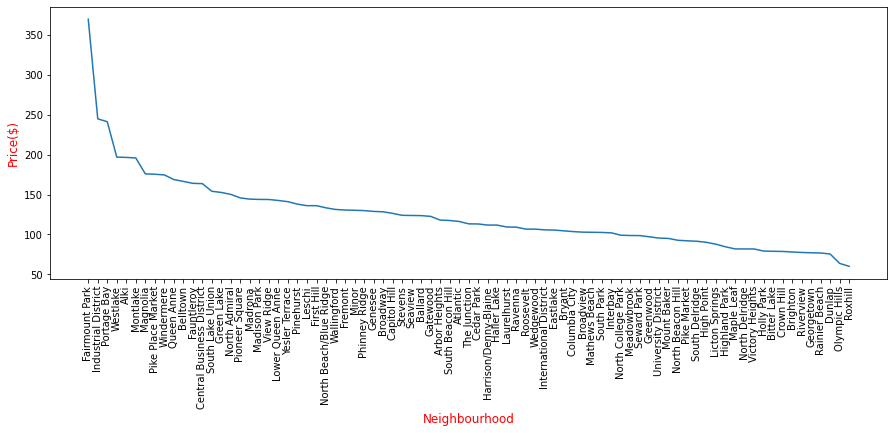

In [139]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.xlabel("Neighbourhood",size=12,color='r')
plt.ylabel("Price($)",size=12,color='r')
plt.plot(df.groupby('neighbourhood').mean()['price_number'].sort_values(ascending=False))

In [113]:
df[df['neighbourhood']=='Industrial District']['price_number']

1924    265.0
1925    320.0
1926    150.0
Name: price_number, dtype: float64

In [114]:
df[df['neighbourhood']=='Industrial District']['property_type']

1924    Camper/RV
1925         Loft
1926        Other
Name: property_type, dtype: object

The first two neighbourhoods with highest average rates are high due to other factors. A boat in the case of Fairmount Park and RV in Industerial District.

The second neighbourhood with highest average price is 'Industrial District' with RV and Loft prperty type, which means that the neighbourhood does not necesarrily infeluence the price, but the needs of the guests and the availability of the property.

Second Factor that can contribute in determining the price of a listing on Airbnb is the property type. 

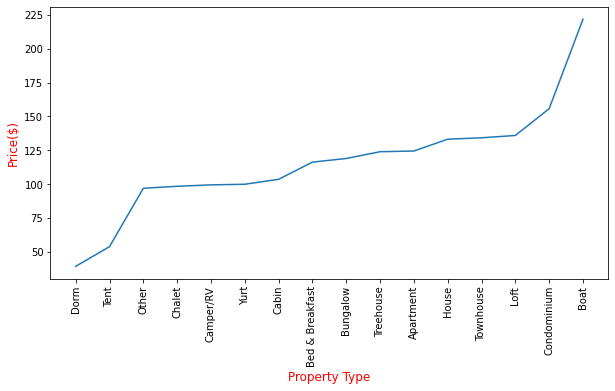

In [140]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.xlabel("Property Type",size=12,color='r')
plt.ylabel("Price($)",size=12,color='r')
plt.plot(df.groupby('property_type').mean()['price_number'].sort_values())

From the curve, we see that a boat is the highest price among the other property types, which can be explained that it offers a special experience for the guest to stay a night on a boat with higher price rather than a normal apartment or a house.

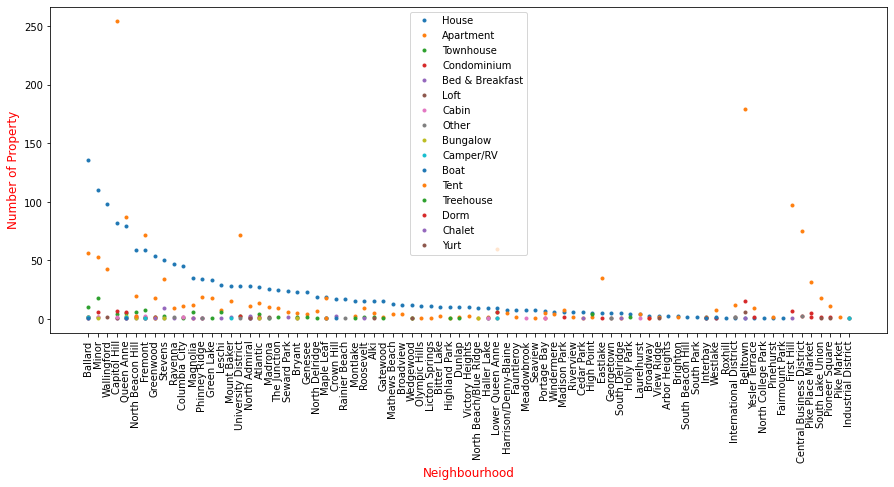

In [141]:
property_types = df['property_type'].value_counts().index
plt.subplots(figsize=(15,6))
plt.xticks(rotation=90)
plt.xlabel("Neighbourhood",size=12,color='r')
plt.ylabel("Number of Property",size=12,color='r')
for property_type in property_types:
    plt.plot(df[df['property_type']==property_type]['neighbourhood'].value_counts(),'.')
    plt.legend(labels = property_types,loc='upper center')


The distribution of property types among all neighbourhoods shows that apartments stay in the first place but they don't give the highest revenue.

Text(0, 0.5, 'Price($)')

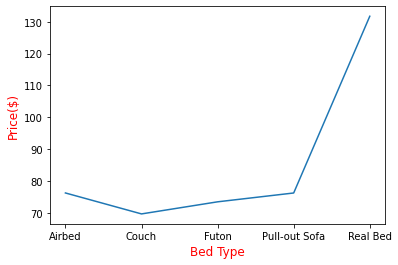

In [142]:
plt.plot(df.groupby('bed_type').mean()['price_number'])
plt.xlabel("Bed Type",size=12,color='r')
plt.ylabel("Price($)",size=12,color='r')

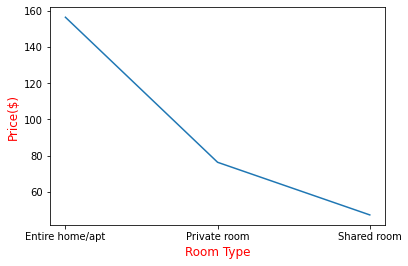

In [143]:
plt.xlabel("Room Type",size=12,color='r')
plt.ylabel("Price($)",size=12,color='r')
plt.plot(df.groupby('room_type').mean()['price_number'])

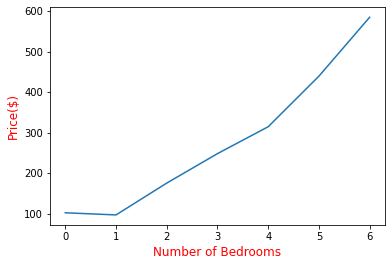

In [144]:
plt.xlabel("Number of Bedrooms",size=12,color='r')
plt.ylabel("Price($)",size=12,color='r')
plt.plot(df.groupby('bedrooms').mean()['price_number'])

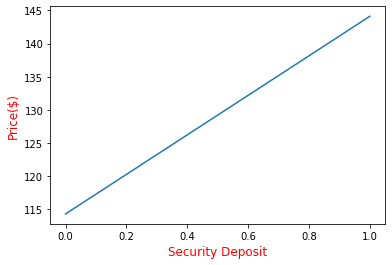

In [145]:
plt.xlabel("Security Deposit",size=12,color='r')
plt.ylabel("Price($)",size=12,color='r')
plt.plot(df.groupby('has_security_deposit').mean()['price_number'])

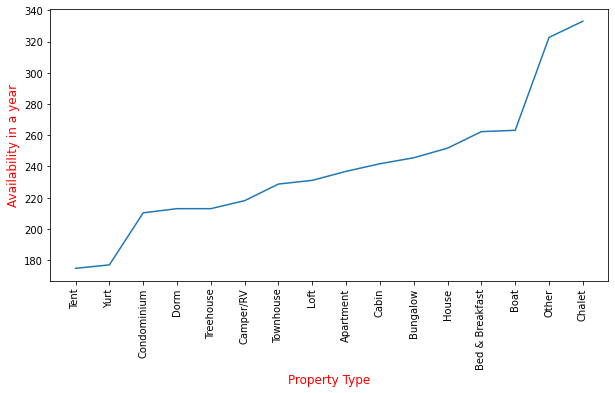

In [146]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.xlabel("Property Type",size=12,color='r')
plt.ylabel("Availability in a year",size=12,color='r')
plt.plot(df.groupby('property_type').mean()['availability_365'].sort_values())

With respect to the availability during one year, we see that tent and yurt has low availability might be because they are quite few and related to the seasonal conditions. On the other hand, Condominuim has higher demand during the year and gain high revenue in the second place after 'boat'.
**Condomnuim is a good choice for a host to gain high income from Airbnb.**

## How to get better review ratings?

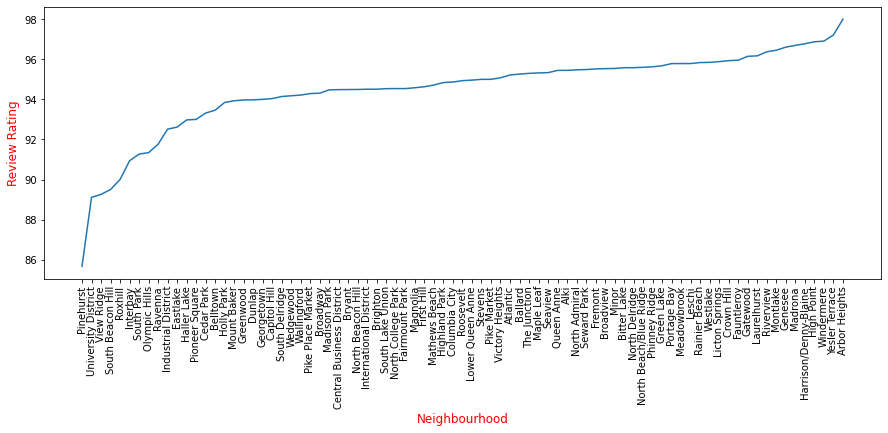

In [147]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.xlabel("Neighbourhood",size=12,color='r')
plt.ylabel("Review Rating",size=12,color='r')
plt.plot(df.groupby('neighbourhood').mean()['review_scores_rating'].sort_values())

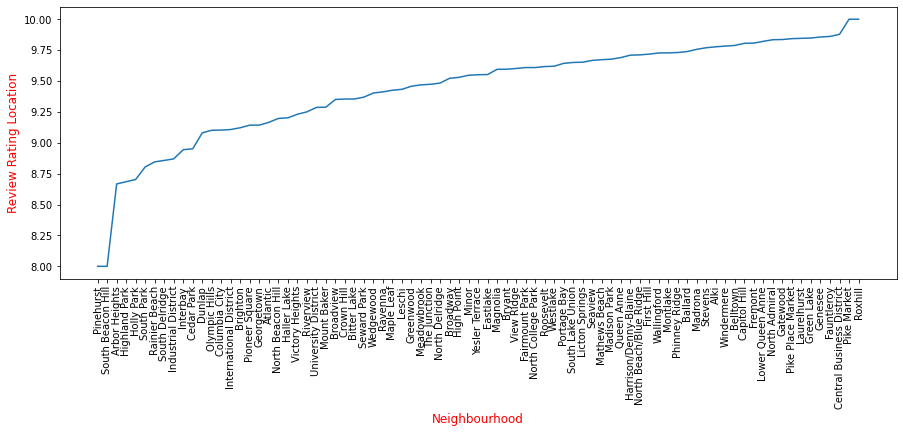

In [148]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.xlabel("Neighbourhood",size=12,color='r')
plt.ylabel("Review Rating Location",size=12,color='r')
plt.plot(df.groupby('neighbourhood').mean()['review_scores_location'].sort_values())

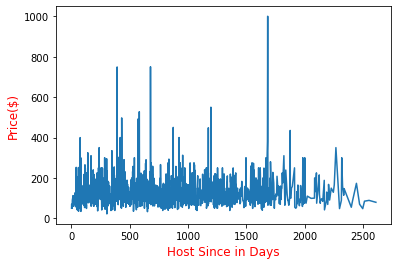

In [149]:
plt.xlabel("Host Since in Days",size=12,color='r')
plt.ylabel("Price($)",size=12,color='r')
plt.plot(df.groupby('host_since_days').mean()['price_number'])

It seems that older hosts are not gaining more income than newer hosts.

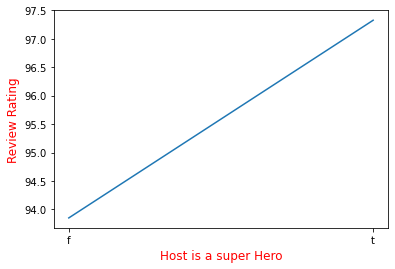

In [151]:
plt.xlabel("Host is a super Hero",size=12,color='r')
plt.ylabel("Review Rating",size=12,color='r')
plt.plot(df.groupby('host_is_superhost').mean()['review_scores_rating'])

hosts who are super hosts are geting higher ratings.

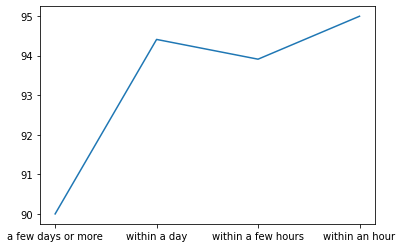

In [74]:
plt.xlabel("Host Response Time",size=12,color='r')
plt.ylabel("Review Rating",size=12,color='r')
plt.plot(df.groupby('host_response_time').mean()['review_scores_rating'])

The response time is affecting the rating. The faster the hosts repond to the guests, the better ratings they have.

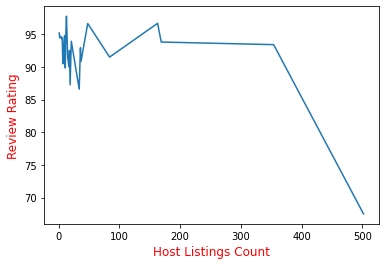

In [152]:
plt.xlabel("Host Listings Count",size=12,color='r')
plt.ylabel("Review Rating",size=12,color='r')
plt.plot(df.groupby('host_listings_count').mean()['review_scores_rating'])

With higher number of listings, the review score falls dramatically.

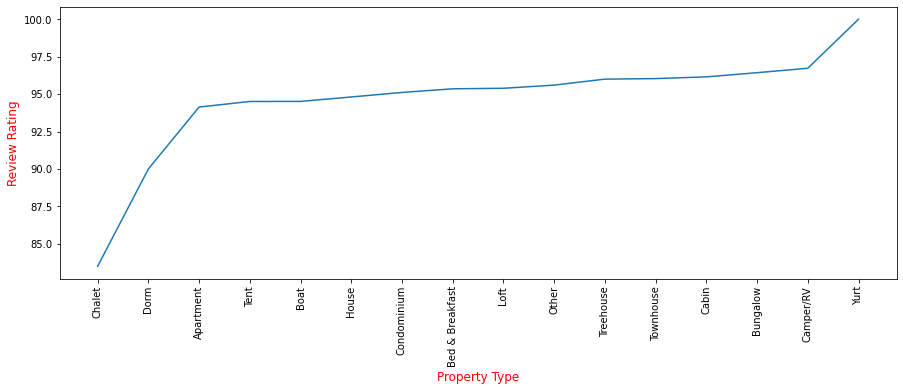

In [154]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.xlabel("Property Type",size=12,color='r')
plt.ylabel("Review Rating",size=12,color='r')
plt.plot(df.groupby('property_type').mean()['review_scores_rating'].sort_values())

Most of the prperty types are in the same range of ratings except Chalet and Dorm with low ratings and yurt with higher rating. It seems that this is due to low number of these property types.

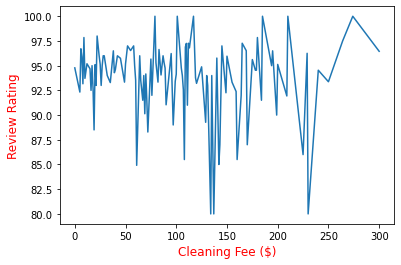

In [156]:
plt.xlabel("Cleaning Fee ($)",size=12,color='r')
plt.ylabel("Review Rating",size=12,color='r')
plt.plot(df.groupby('cleaning_fee_number').mean()['review_scores_rating'])

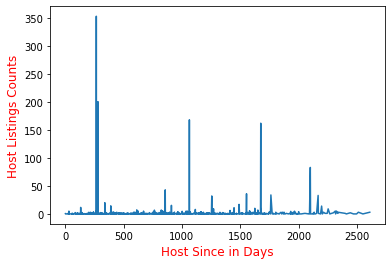

In [157]:
plt.xlabel("Host Since in Days",size=12,color='r')
plt.ylabel("Host Listings Counts",size=12,color='r')
plt.plot(df.groupby('host_since_days').mean()['host_listings_count'],'-')

Hosts with more experience have more knowledge about the market and they don't have higher listings count.

## How is the demand for Airbnb properties in Seattle? 

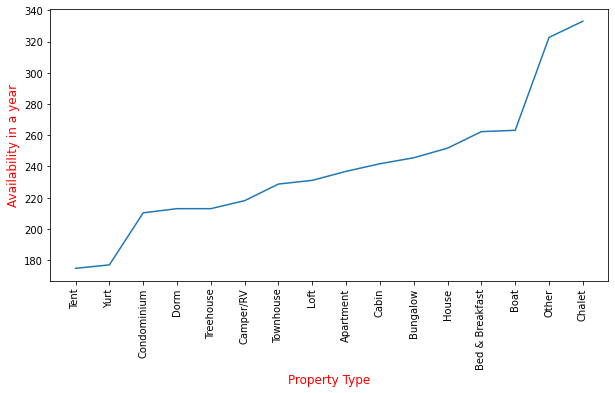

In [158]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.xlabel("Property Type",size=12,color='r')
plt.ylabel("Availability in a year",size=12,color='r')
plt.plot(df.groupby('property_type').mean()['availability_365'].sort_values())

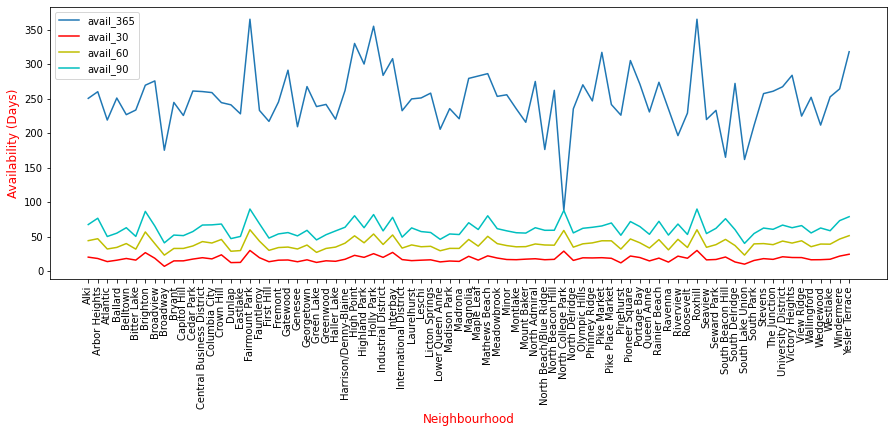

In [159]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.xlabel("Neighbourhood",size=12,color='r')
plt.ylabel("Availability (Days)",size=12,color='r')
avail_365 = plt.plot(df.groupby('neighbourhood').mean()['availability_365'])
avail_30 =plt.plot(df.groupby('neighbourhood').mean()['availability_30'],'-r')
avail_60 =plt.plot(df.groupby('neighbourhood').mean()['availability_60'],'-y')
avail_90 =plt.plot(df.groupby('neighbourhood').mean()['availability_90'],'-c')
plt.legend(['avail_365','avail_30','avail_60','avail_90'])
plt.show()

The availability in 30 days, 60 days, and 90 days have the same pattern. The availability in a year is quite different, especially in North College Park. The availability drops yearly, unlike the monthly availability. This means that this neighborhood has a higher demand seasonally over the year.

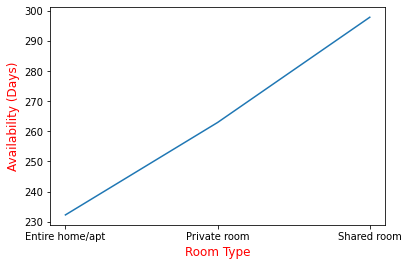

In [160]:
plt.xlabel("Room Type",size=12,color='r')
plt.ylabel("Availability (Days)",size=12,color='r')
plt.plot(df.groupby('room_type').mean()['availability_365'].sort_values())

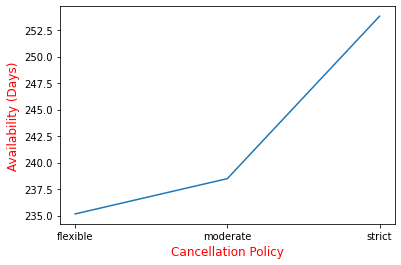

In [161]:
plt.xlabel("Cancellation Policy",size=12,color='r')
plt.ylabel("Availability (Days)",size=12,color='r')
plt.plot(df.groupby('cancellation_policy').mean()['availability_365'].sort_values())

The Entire home/apartment has higher demand over the year. Also the hosts who requires restrict cancellation policy don'y have higher demand on their properties.